In [18]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification as mkc
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


data = pd.read_csv("/content/drive/Othercomputers/My MacBook Pro/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed-Encoded_Chugh_CBE_FOR_ALL.csv")

In [28]:
from crucio import MWMOTE
mwmote = MWMOTE(k1 = 3, k2 = 3, k3 = 3, M=2, Cth=3,CMAX=3)
balanced_df = mwmote.balance(data, 'FraudFound')

In [29]:
balanced_df.to_csv('MWMOTE_export_WOE.csv', index=False)

Shape of X: (15420, 23)
Shape of y: (15420, 1)


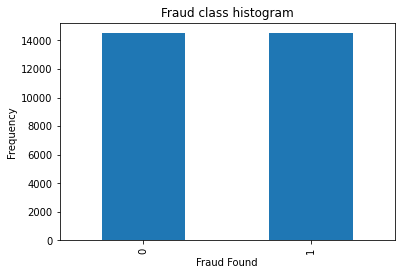

In [30]:
pd.value_counts(balanced_df['FraudFound']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Fraud Found')
plt.ylabel('Frequency')
balanced_df['FraudFound'].value_counts()

X = np.array(data.iloc[:, balanced_df.columns != 'FraudFound'])
y = np.array(data.iloc[:, balanced_df.columns == 'FraudFound'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Number policies X_train dataset: ", X_train.shape)
print("Number policies  y_train dataset: ", y_train.shape)
print("Number policies  X_test dataset: ", X_test.shape)
print("Number policies  y_test dataset: ", y_test.shape)



Number policies X_train dataset:  (10794, 23)
Number policies  y_train dataset:  (10794, 1)
Number policies  X_test dataset:  (4626, 23)
Number policies  y_test dataset:  (4626, 1)


# Creating Random Forest Classifier

In [65]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion= 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [66]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[4339    2]
 [   0  285]]
Accuracy Score is 0.999568
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4341
           1       0.99      1.00      1.00       285

    accuracy                           1.00      4626
   macro avg       1.00      1.00      1.00      4626
weighted avg       1.00      1.00      1.00      4626

AUC-ROC: 0.9997696383321815
LOGLOSS Value is 0.014933


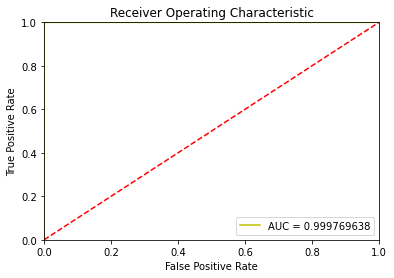

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.6f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.6f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.9f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()